Linear regression aims to identify the relationship between a dependent variable and independent variables. Its primary objective is to find the best-fit line by minimizing the error between observed and predicted values. The goal is to minimize the difference or distance between data points and the line, known as the “error” or “residual,” ensuring accurate predictions and a representative model of the variable relationship.
The slope (m) and intercept (b) in linear regression represent the parameters that determine the characteristics of the best-fit line. The slope determines the rate of change of the dependent variable with respect to the independent variable, while the intercept represents the value of the dependent variable when the independent variable is zero. These parameters are crucial in defining the relationship between the variables and constructing the linear regression model.

we calculate the error by subtracting the predicted values from the actual values.
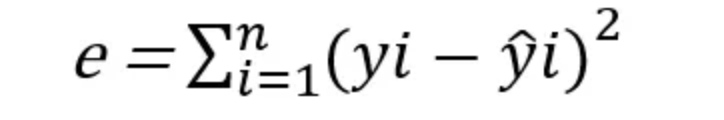


By substituting the estimated value (ŷ) into the equation of the best-fit line (y = mx + b).

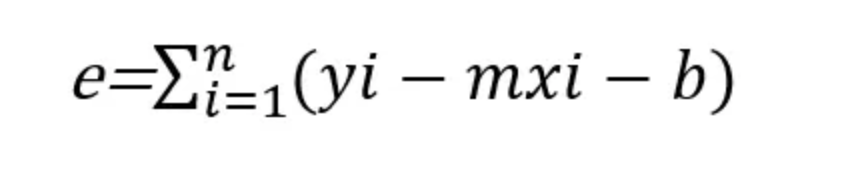






To derive the optimal values for the intercept (b) and slope (m) mathematically, we take the first derivatives of the objective function with respect to each coefficient. By setting these derivatives equal to zero, we can find the critical points where the prediction error is minimized.


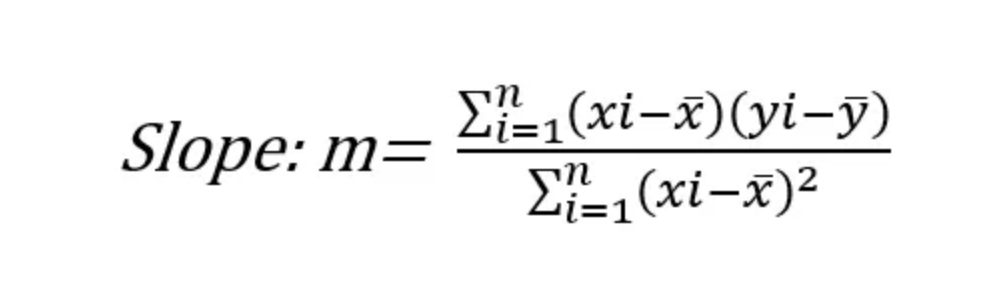


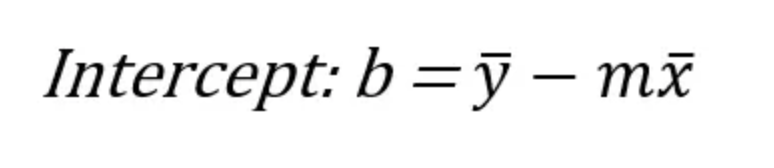

**Assumptions for Simple Linear Regression**

1. **Linearity:** The relationship between X and Y must be linear.

Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors:** There is not a relationship between the residuals and the Y variable; in other words, Y is independent of errors.

Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors:** The residuals must be approximately normally distributed.

Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances:** The variance of the residuals is the same for all values of X.

Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

In [ ]:
import numpy as np

class SimpleLinearRegression():
    def __init__(self):
        self.coefficient = None
        self.intercept = None

    def fit(self, x, y):
        '''
            Given a dataset with 1 input feature x and output feature y,
            estimates the coefficient and compute the intercept.
        '''
        self.coefficient = self._coefficient_estimate(x, y)
        self.intercept = self._compute_intercept(x, y)

    def predict(self, x):
        '''
            y = b_0 + b_1*x
        '''
        x_times_coeff = np.multiply(x, self.coefficient)
        return np.add(x_times_coeff, self.intercept)

    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_average = np.average(y_true)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_true)):
            residual_sum_of_squares += (y_true[i] - y_pred[i])**2
            total_sum_of_squares += (y_true[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

    def _compute_intercept(self, x, y):
        '''
            intercept = y_bar - coefficient*x_bar

            WHERE:  y_bar = average(y),
                    x_bar = average(x),
                    coefficient = coefficient already estimated
        '''
        # find the average of the array x
        x_average = np.average(x)

        # multiply the coefficient and the average of the x values
        mul = self.coefficient*x_average

        return np.average(y) - mul

    def _coefficient_estimate(self, x, y):
        '''
            coefficient_{x,y} = ∑_{i=0}^{n} (x_i - x_bar) * (y_i - y_bar)
                                _________________________________________
                                ∑_{i=0}^{n} (x_i - x_bar)^2
        '''
        numerator = 0
        denominator = 0

        for i in range(len(x)):
            x_value = x[i]
            y_value = y[i]
            x_average = np.average(x)
            y_average = np.average(y)

            numerator += (x_value - x_average) * (y_value - y_average)
            denominator += (x_value - x_average)**2

        return numerator / denominator

Normal Equation:

Gradient descent gives one way of minimizing J, hypothesis function. Lets discuss a second way of doing so, this time performing the minimization explicitly and without resorting to an iterative algorithm. In this method, we will minimize J by explicitly taking its derivatives with respect to the θj’s, and setting them to zero.

The minimum occurs when all posible directional derivatives are zero, which
gives us the normal equations. They are called the normal equations because they specify that the residual must be normal (orthogonal) to every vector in the span of A.

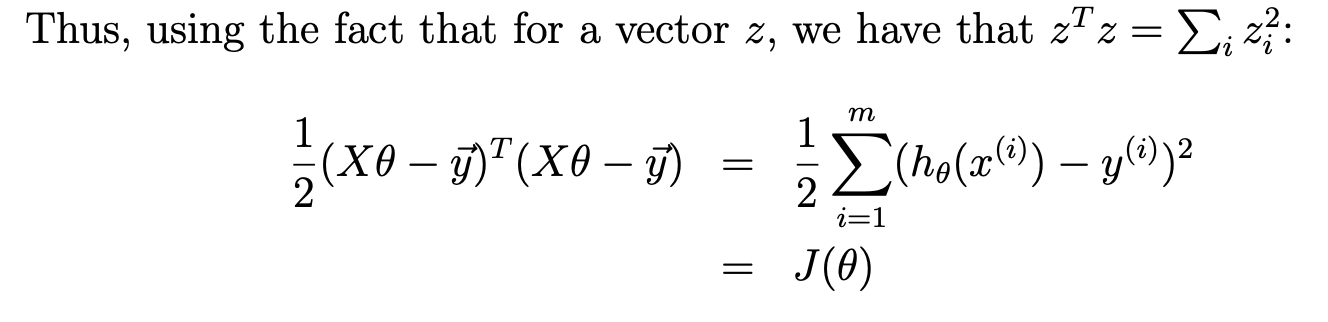

Derivation of Normal equation

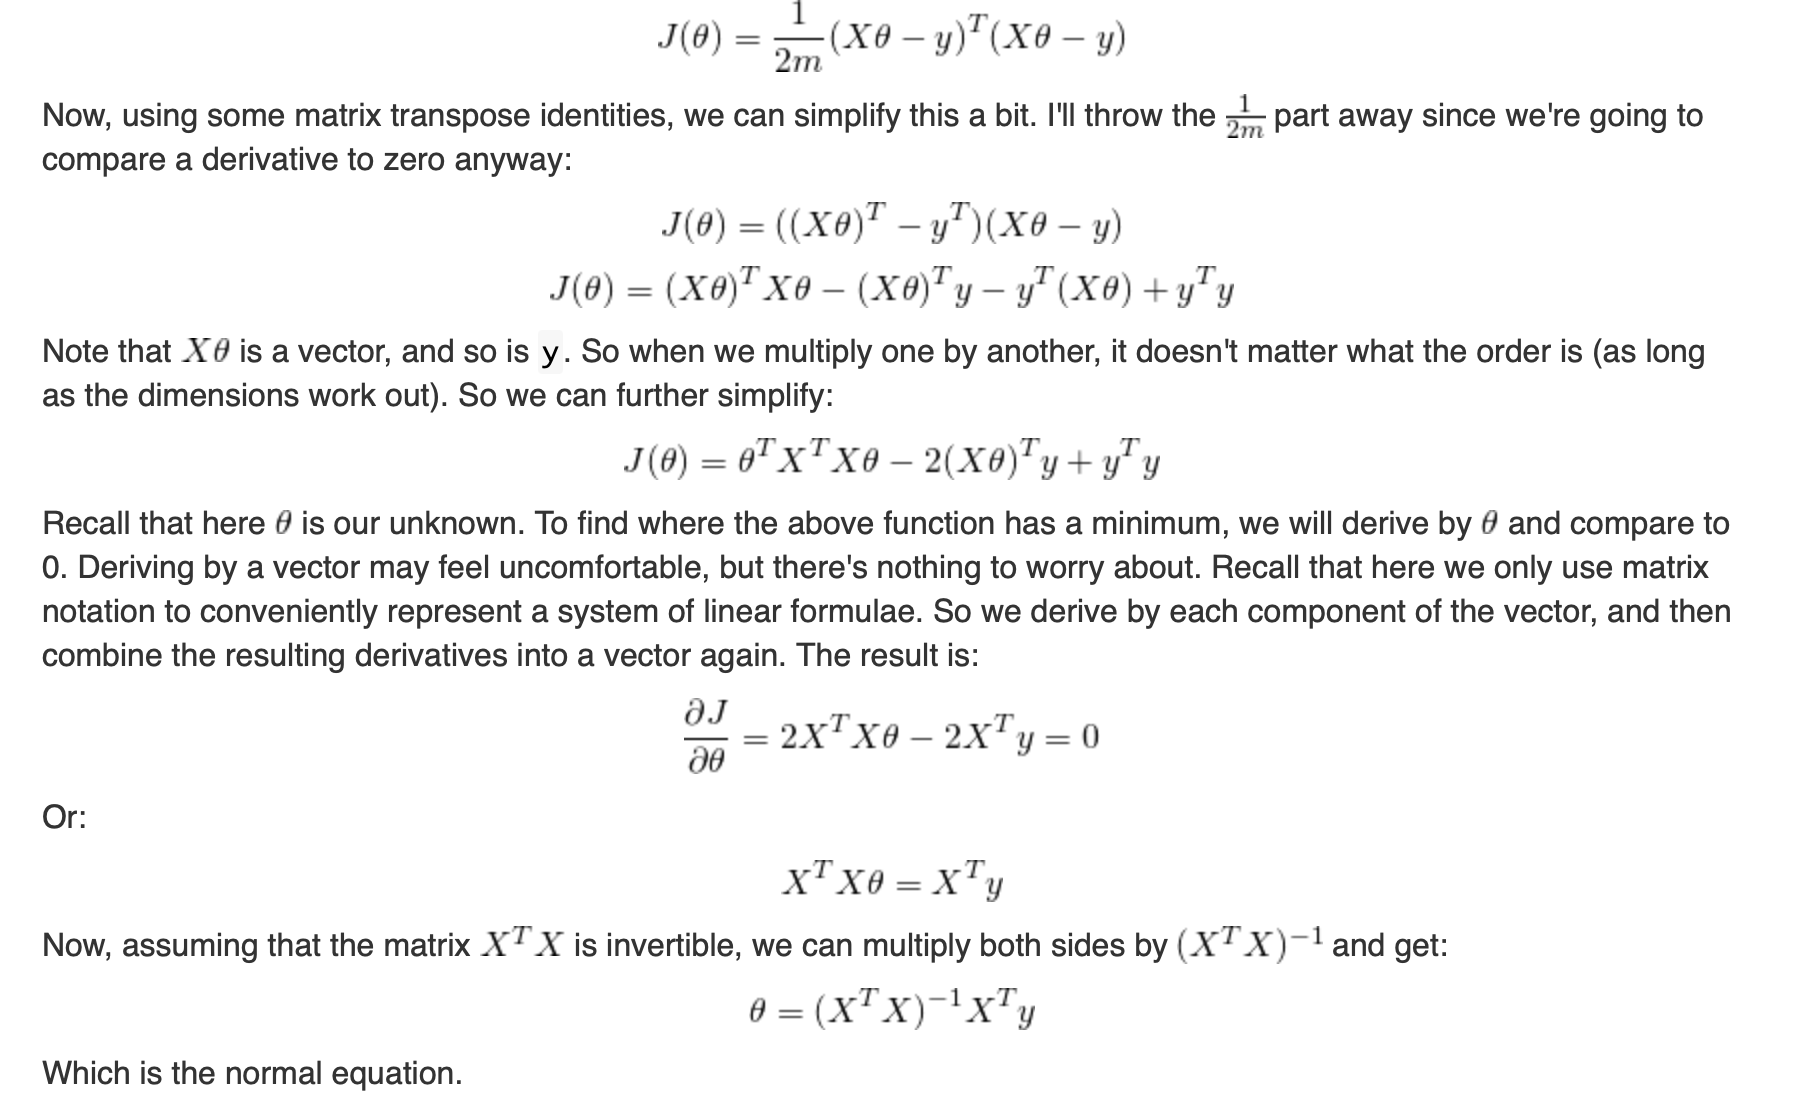

In [ ]:
import numpy as np
import copy

class MultipleLinearRegression():
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):
        # prepare x and y values for coefficient estimates
        x = self._transform_x(x)
        y = self._transform_y(y)

        betas = self._estimate_coefficients(x, y)

        # intercept becomes a vector of ones
        self.intercept = betas[0]

        # coefficients becomes the rest of the betas
        self.coefficients = betas[1:]

    def predict(self, x):
        '''
            y = b_0 + b_1*x + ... + b_i*x_i
        '''
        predictions = []
        for index, row in x.iterrows():
            values = row.values

            pred = np.multiply(values, self.coefficients)
            pred = sum(pred)
            pred += self.intercept

            predictions.append(pred)

        return predictions

    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values = y_true.values
        y_average = np.average(y_values)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_values)):
            residual_sum_of_squares += (y_values[i] - y_pred[i])**2
            total_sum_of_squares += (y_values[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        x.insert(0, 'ones', np.ones( (x.shape[0], 1) ))
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values

    def _estimate_coefficients(self, x, y):
        '''
            β = (X^T X)^-1 X^T y
            Estimates both the intercept and all coefficients.
        '''
        xT = x.transpose()

        inversed = np.linalg.inv( xT.dot(x) )
        coefficients = inversed.dot( xT ).dot(y)

        return coefficients

# **Correlation:**


If we want to provide a measure of the strength of the linear relationship between two quantitative variables, a good way is to report the correlation coefficient between them.

The sample correlation coefficient is typically denoted as r. It is also known as Pearson’s r. The population correlation coefficient is generally denoted as p, pronounced “rho.”


**Sample Correlation Coefficient**

The sample correlation coefficient, r, is calculated using the following formula:

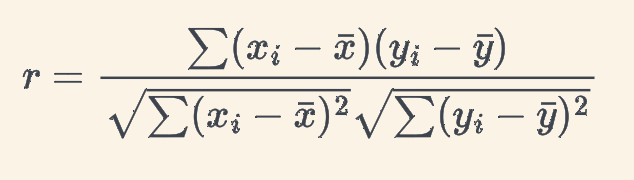


**Properties of the correlation coefficient, r:**

1. -1=<r<=1, i.e.  takes values between -1 and +1, inclusive.

2. The sign of the correlation provides the direction of the linear relationship. The sign indicates whether the two variables are positively or negatively related.

3. A correlation of 0 means there is no linear relationship.

4. There are no units attached to r.

5. As the magnitude of r approaches 1, the stronger the linear relationship.

6. As the magnitude of r approaches 0, the weaker the linear relationship.

7. If we fit the simple linear regression model between Y and X, then r has the same sign as beta1, which is the coefficient of X in the linear regression equation.

8. The correlation value would be the same regardless of which variable we defined as X and Y.

